# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


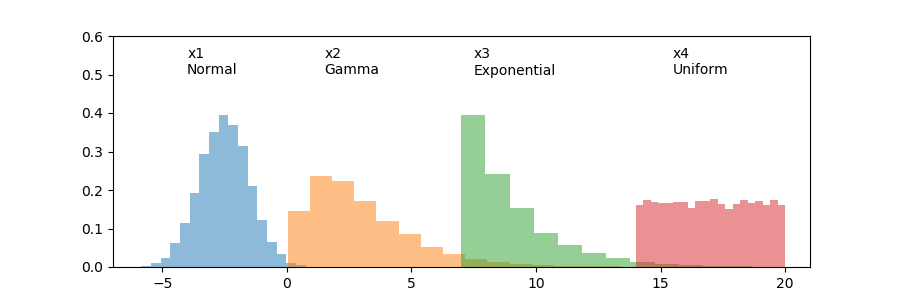

Text(15.4953,0.5,'x4\nUniform')

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# Generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# Plot the histograms
plt.figure(figsize=(9,3))

plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5)
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


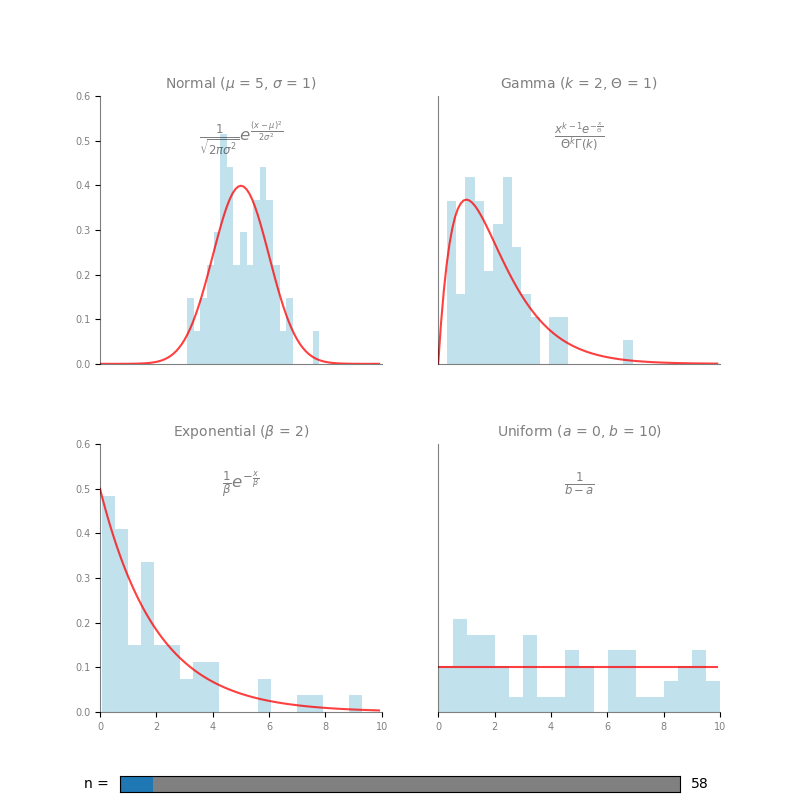

0

In [1]:
import math
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import numpy as np
import scipy.stats as stats

%matplotlib notebook

def build_samples():
    '''Generates 4 random variables from the random, gamma, exponential, and uniform distributions'''
    s1 = np.random.normal(mu,sigma,1000)
    s2 = np.random.gamma(k,theta,1000)
    s3 = np.random.exponential(beta,1000)
    s4 = np.random.uniform(a,b,1000)
    
    return [s1,s2,s3,s4]


def build_pdfs():
    '''Generates PDFS for the random, gamma, exponential, and uniform distributions'''
    y1 = np.array([stats.norm.pdf(x_val,loc=mu,scale=sigma) for x_val in x])
    y2 = np.array([stats.gamma.pdf(x_val,k,loc=0,scale=theta) for x_val in x])
    y3 = np.array([stats.expon.pdf(x_val,loc=0,scale=beta) for x_val in x])
    y4 = np.array([stats.uniform.pdf(x_val,loc=a,scale=b)for x_val in x])
    
    return [y1,y2,y3,y4]


def build_text():
    
    e1 = r'$\frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{(x-\mu)^2}{2\sigma^2}}$'
    e2 = r'$\frac{x^{k-1} e^{-\frac{x}{\Theta}}}{\Theta^k\Gamma(k)}$'
    e3 = r'$\frac{1}{\beta} e^{-\frac{x}{\beta}}$'
    e4 = r'$\frac{1}{b-a}$'
    
    return [e1,e2,e3,e4]


def build_titles():
    '''Generates descriptive subplot titles'''
    
    t1 = r'Normal ($\mu$ = ' + str(mu) + ', $\sigma$ = ' + str(sigma) + ')'
    t2 = r'Gamma ($k$ = ' + str(k) + ', $\Theta$ = ' + str(theta) + ')'
    t3 = r'Exponential ($\beta$ = ' + str(beta) + ')'
    t4 = r'Uniform ($a$ = ' + str(a) + ', $b$ = ' + str(b) + ')'

    return [t1,t2,t3,t4]


def clean_ax(i):
    '''Sets all the non-default parameters for each object contained in a given subplot'''
    
    # Clear subplot, set ranges for x- and y-axes, and set title
    axs[i].cla()
    axs[i].axis(ranges)
    axs[i].set_title(titles[i], fontsize=10, alpha=0.5)
    axs[i].text(5,0.5,text[i],fontsize=12,alpha=0.5,ha='center')
    
    # Remove x- and y-axes ticks and labels from subplots that don't need them
    if i < 2: axs[i].get_xaxis().set_visible(False)
    if i == 1 or i == 3: axs[i].get_yaxis().set_visible(False)
    
    # Remove unnecessary axis lines and lighten necessary axis lines
    spines = list(axs[i].spines.values())
    spines[0].set_alpha(0.5)
    spines[1].set_visible(False)
    spines[2].set_alpha(0.5)
    spines[3].set_visible(False)
    
    # Set fontsize and alpha for all tick labels
    for tick in axs[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(7)
        tick.label.set_alpha(0.5)
    for tick in axs[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(7)
        tick.label.set_alpha(0.5)
        

def redraw_subplots(curr_n):
    '''Re-draw each subplot'''
    
    for i in range(len(axs)):
        clean_ax(i)
        axs[i].plot(x,pdfs[i], alpha=0.75, color='red')
        axs[i].hist(samples[i][:curr_n], normed=True, bins=bins, alpha=0.75, color='lightblue')
        
        
def set_n(val):
    '''Resets the value of n and redraws the subplots'''
    
    n = int(slider_n.val)
    redraw_subplots(n)
    
        
def update(curr):
    '''Stops the animation if complete or redraws the subplots'''
    
    # Stop if the end has been reached
    if curr == n:
        anim.event_source.stop()
    
    redraw_subplots(curr)


# Initial parameters, x- & y-axis ranges, and x values for pdfs
n,bins,mu,sigma,k,theta,beta,a,b = 150,20,5,1,2,1,2,0,10
ranges = [0,10,0,0.6]
x = np.array(np.arange(0,10,0.1))

# Define figure and subplots
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(8,8))
fig.subplots_adjust(hspace=0.3)
axs = [ax1,ax2,ax3,ax4]

# Build data, text, and titles for subplots
pdfs = build_pdfs()
samples = build_samples()
text = build_text()
titles = build_titles()

# Initialize each subplot
for i in range(len(axs)):
    clean_ax(i)

# Begin animation
anim = animation.FuncAnimation(fig,update,interval=10,blit=True,repeat=False)

# Create slider
slider_n_ax = plt.axes([0.15, 0.01, .7, 0.02], facecolor='grey')
slider_n_ax.set_yticks([])
slider_n = widgets.Slider(slider_n_ax, 'n =', 0, 1000, valinit=n, valfmt="%i")
slider_n.on_changed(set_n)